Epoch 1/50
20/20 [==============================] - 2s 31ms/step - loss: 29887.1426 - mean_absolute_error: 154.0941 - val_loss: 27250.2578 - val_mean_absolute_error: 146.6862
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 29430.3691 - mean_absolute_error: 152.6661 - val_loss: 26813.1328 - val_mean_absolute_error: 145.1972
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 28842.2988 - mean_absolute_error: 150.6584 - val_loss: 26133.7910 - val_mean_absolute_error: 142.8945
Epoch 4/50
20/20 [==============================] - 0s 11ms/step - loss: 27765.5488 - mean_absolute_error: 147.2981 - val_loss: 25045.2637 - val_mean_absolute_error: 139.1637
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 26125.1113 - mean_absolute_error: 142.0229 - val_loss: 23320.6680 - val_mean_absolute_error: 133.2923
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 23427.3398 - mean_absolute_error: 133.0491 - val_loss: 2

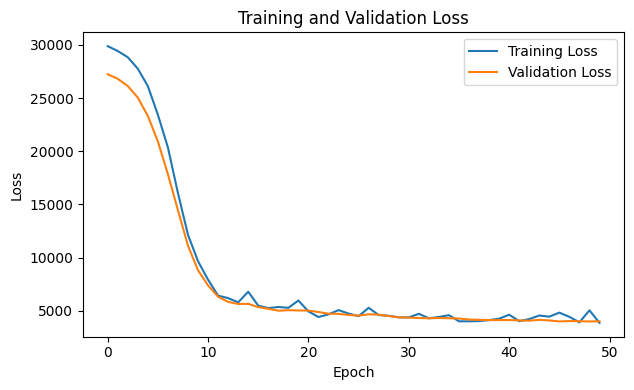

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FFN model with L2 regularization and Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}, Test MAE: {test_mae:.2f}")

# Plot loss and epoch graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()



plt.tight_layout()
plt.show()


In [2]:
# Build the FFN model with L2 regularization (without Dropout)
model_l2_only = Sequential()
model_l2_only.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model_l2_only.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_l2_only.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model with L2 regularization
model_l2_only.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model with early stopping
history_l2_only = model_l2_only.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model with L2 regularization
test_loss_l2_only, test_mae_l2_only = model_l2_only.evaluate(X_test, y_test)
print(f"Test Loss (L2 Only): {test_loss_l2_only:.2f}, Test MAE (L2 Only): {test_mae_l2_only:.2f}")


Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 29715.6348 - mean_absolute_error: 153.6371 - val_loss: 27018.4883 - val_mean_absolute_error: 145.9016
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 29082.2344 - mean_absolute_error: 151.6094 - val_loss: 26296.1797 - val_mean_absolute_error: 143.4337
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 27972.8477 - mean_absolute_error: 148.0482 - val_loss: 25043.3008 - val_mean_absolute_error: 139.1496
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 25997.5332 - mean_absolute_error: 141.7600 - val_loss: 22982.2324 - val_mean_absolute_error: 131.9127
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 22903.2383 - mean_absolute_error: 131.1510 - val_loss: 19955.9102 - val_mean_absolute_error: 120.6949
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 18640.7305 - mean_absolute_error: 115.7077 - val_loss: 16